# Projeto 1

O presente projeto simula a demanda de uma seguradora que possui uma base de dados com milhares de imoveis localizados no Rio de Janeiro. Foi solicitado a analise dos dados dessa base, para que decisões pudessem ser tomadas baseadas nesses dados.

In [249]:
import pandas as pd

In [250]:
dados = pd.read_csv('dados/aluguel.csv', sep = ';')
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [251]:
type(dados)

pandas.core.frame.DataFrame

In [252]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


## Informações gerais sobre a base de dados

In [253]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [254]:
#Apresentando os tipos de dados de cada variável no DataFrame
dados.dtypes

Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object

In [255]:
#Buscando a quantidade total de linhas e colunas no DataFrame (dimensões)
dados.shape
print('A quantidade de linhas no dataset é de {}. \nA quantidade de colunas no dataset é de {}.'.format(dados.shape[0], dados.shape[1]))

A quantidade de linhas no dataset é de 32960. 
A quantidade de colunas no dataset é de 9.


## Tratamento e limpeza do dataset

In [256]:
#Checando os dados em branco
dados.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
32955,False,False,False,False,False,False,False,False,False
32956,False,False,False,False,False,False,False,False,False
32957,False,False,False,False,False,False,False,False,False
32958,False,False,False,False,False,False,False,False,True


In [257]:
# Checando se há imoveis no dataset que tem Null values na variável valor
valor_nulo = dados['Valor'].isnull()
dados[valor_nulo]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
76,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
2186,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
2456,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2646,Loja/Salão,Barra da Tijuca,0,2,0,80,NaN,NaN,NaN
2941,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2973,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
6598,Loja/Salão,Andaraí,0,0,0,326,NaN,NaN,1140.0
7302,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
12683,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
13229,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0


In [258]:
# Removendo do dataset os imoveis que tem o Null values na variável valor, pois não faz sentido para a empresa analisar imoveis sem preço
# Checando a quantidade de imoveis que tinha valor nulo
A = dados.shape[0]
dados.dropna(subset = ['Valor'], inplace = True)
B = dados.shape[0]
A - B

17

In [259]:
#Tratando os dados nulos das variáveis 'Condomínio e 'IPTU'
dados.fillna({'Condominio': 0, 'IPTU': 0.00}, inplace = True)
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,0.0


## Tipos de imovel

In [260]:
#Removendo todos os dados duplicados de forma que no output mostre os possíveis tipos de imoveis presentes na base de dados.
tipos_de_imovel = list(dados['Tipo'].drop_duplicates())
tipos_de_imovel

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

In [261]:
#Transformando as series do output anterior em um DataFrame.
#Renomeando o index do DataFrame e criando um index baseado na quantidade de linhas do DataFrame.
df_tipos_de_imovel = pd.DataFrame(data = tipos_de_imovel, columns = ['Tipo'])
df_tipos_de_imovel.columns.name = 'ID'
df_tipos_de_imovel.index = (range(df_tipos_de_imovel.shape[0]))
df_tipos_de_imovel

ID,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


In [262]:
#Apresentando a distribuição de tipo de imoveis no dataset
dados.Tipo.value_counts()

Apartamento                    19525
Conjunto Comercial/Sala         6810
Loja/Salão                      1424
Casa de Condomínio               996
Casa                             965
Quitinete                        836
Galpão/Depósito/Armazém          623
Flat                             476
Prédio Inteiro                   301
Casa Comercial                   265
Casa de Vila                     249
Loja Shopping/ Ct Comercial      246
Box/Garagem                       82
Terreno Padrão                    70
Loft                              51
Sítio                             10
Loteamento/Condomínio              5
Studio                             4
Hotel                              2
Chácara                            1
Pousada/Chalé                      1
Indústria                          1
Name: Tipo, dtype: int64

## Imóveis Residenciais

Após apresentar para a seguradora o relatório com todos os tipos de imóveis na base de dados, foi solicitado um outro relatório contendo informações apenas de imóveis residenciais, visto que são imoveis deste modelo que a seguradora foca no seu modelo de negócio.

In [263]:
# listando todos os tipos de imoveis presentes no dataset
list(dados['Tipo'].drop_duplicates())

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

In [264]:
dados['Tipo']

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32943, dtype: object

In [265]:
#Criando um lista com os imoveis de natureza residencial
#Criando uma Serie booleana em que o parametro para True é o dado na variável Tipo está dentro da lista residencial
residencial = ['Quitinete',
               'Casa',
               'Apartamento',
               'Casa de Condomínio',
               'Casa de Vila']
filtro = dados['Tipo'].isin(residencial)
filtro

0         True
1         True
2        False
3         True
4         True
         ...  
32955     True
32956     True
32957     True
32958     True
32959    False
Name: Tipo, Length: 32943, dtype: bool

In [266]:
#Passando a variável filtro dentro do dataset
imoveis_residencial = dados[filtro]
imoveis_residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [267]:
#Checando se os tipos de imoveis no df são apenas os residenciais especificados acima
list(imoveis_residencial['Tipo'].drop_duplicates())

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

In [268]:
#Reestruturando o index do DataFrame de acordo com a quantidade de linhas
imoveis_residencial.index = range(imoveis_residencial.shape[0])
imoveis_residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
22566,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22567,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22568,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22569,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


Visando auxiliar a análise dos imóveis, foi selecionado de forma mais especifica ainda, somente os imoveis que além de ser rensidencial também são classificados como algum tipo de casa.

In [269]:
filtro_casa = (dados['Tipo'] == 'Casa') | (dados['Tipo'] == 'Casa de Condomínio') | (dados['Tipo'] == 'Casa de Vila')
filtro_casa

0        False
1         True
2        False
3        False
4        False
         ...  
32955    False
32956    False
32957    False
32958    False
32959    False
Name: Tipo, Length: 32943, dtype: bool

In [270]:
df_casa = dados[filtro_casa]
df_casa.index = range(df_casa.shape[0])
df_casa

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
1,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
2,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0
3,Casa de Condomínio,Taquara,3,1,1,115,2000.0,0.0,0.0
4,Casa de Condomínio,Barra da Tijuca,4,3,2,466,7500.0,2695.0,0.0
...,...,...,...,...,...,...,...,...,...
2205,Casa de Condomínio,Freguesia (Jacarepaguá),3,3,1,155,2000.0,530.0,1250.0
2206,Casa,Bento Ribeiro,2,1,0,60,1400.0,0.0,0.0
2207,Casa de Condomínio,Barra da Tijuca,3,5,3,1000,20000.0,3000.0,0.0
2208,Casa,Centro,5,0,1,160,5000.0,0.0,80.0


### Exportanto para um arquivo .CSV o DataFrame com imoveis residenciais e o DataFrame com casa

In [271]:
imoveis_residencial.to_csv('dados/imoveis_residencial.csv', sep = ';', index = False)

In [272]:
df_casa.to_csv('dados/imoveis_casas.csv', sep = ';', index = False)

## Seleções segmentada de imoveis

Após analisar o ultimo relatório enviado, a seguradora, desta vez com mais conhecimento acerca da base de dados trabalhada, solicitou dados de imoveis com caracteristicas bem segmentadas.

### Selecionando os imoveis com área entre 60 e 100 metros quadrados, incluindo os limites

In [273]:
filtro_area = (dados['Area'] >= 60) & (dados['Area'] <= 100)
filtro_area

0        False
1         True
2        False
3        False
4        False
         ...  
32955    False
32956     True
32957    False
32958     True
32959    False
Name: Area, Length: 32943, dtype: bool

In [274]:
df_area = dados[filtro_area]
df_area.index = range(df_area.shape[0])
df_area

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
1,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
2,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...,...
10174,Apartamento,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,0.0
10175,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0
10176,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
10177,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0


### Selecionando os imoveis que tenham pelo menos 4 quartos e aluguel menor que 2.000,00

In [275]:
filtro_quartos = (dados['Quartos'] >= 4) & (dados['Valor'] < 2000)
filtro_quartos

0        False
1        False
2        False
3        False
4        False
         ...  
32955    False
32956    False
32957    False
32958    False
32959    False
Length: 32943, dtype: bool

In [276]:
#Elaborando um DataFrame contendo apenas imoveis que tenha pelo menos 4 quartos e aluguel menor que R$ 2.000,00
df_1 = dados[filtro_quartos]
df_1.index = range(df_1.shape[0])
df_1

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Apartamento,Recreio dos Bandeirantes,4,2,2,160,1900.0,830.0,0.0
1,Apartamento,Taquara,4,1,1,110,1900.0,0.0,0.0
2,Casa,Campo Grande,4,1,4,100,1600.0,0.0,0.0
3,Casa,Engenho de Dentro,4,3,0,120,1500.0,0.0,0.0
4,Apartamento,Recreio dos Bandeirantes,4,2,2,125,1700.0,0.0,90.0
5,Casa de Vila,Méier,4,0,1,85,1600.0,0.0,0.0
6,Pousada/Chalé,Barra da Tijuca,23,0,23,862,1480.0,295.0,0.0
7,Casa,Campo Grande,4,1,0,140,1700.0,0.0,0.0
8,Apartamento,Campo Grande,4,2,1,115,1900.0,500.0,0.0
9,Apartamento,Recreio dos Bandeirantes,4,2,1,105,1900.0,1492.0,205.0


In [277]:
#Organizando o DataFrame em ordem crescente do maior Valor para o menor.
df_1.sort_values(by = ['Valor'])

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
31,Box/Garagem,Centro,5,5,0,30,490.0,220.0,0.0
32,Apartamento,Taquara,4,3,1,190,1200.0,0.0,0.0
19,Casa,Santo Cristo,5,0,0,85,1200.0,0.0,0.0
26,Casa,Pedra de Guaratiba,4,1,0,100,1300.0,0.0,0.0
10,Apartamento,Cidade Nova,4,0,0,110,1300.0,0.0,0.0
22,Apartamento,Camorim,4,1,1,96,1350.0,747.0,0.0
6,Pousada/Chalé,Barra da Tijuca,23,0,23,862,1480.0,295.0,0.0
15,Apartamento,Recreio dos Bandeirantes,4,3,2,250,1500.0,1380.0,700.0
3,Casa,Engenho de Dentro,4,3,0,120,1500.0,0.0,0.0
39,Apartamento,Barra da Tijuca,4,3,4,148,1500.0,1600.0,196.0


## Criando Novas Variáveis

Para auxiliar a seguradora, foi criado novas variáveis contendo informações importantes na hora de analisar um imovel.

In [278]:
#Criando as variaveis contendo as seguintes informações: Valor bruto, Valor m2, Valor bruto m2
dados['Valor Bruto'] = dados['Valor'] + dados['Condominio'] + dados['IPTU']
dados['Valor m2'] = (dados['Valor'] / dados['Area']).round(2)
dados['Valor Bruto m2'] = (dados['Valor Bruto'] / dados['Area']).round(2)

In [279]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0,34.67,68.87
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,1200.0,17.14,17.14
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,29.33
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38,15.38
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,57223.0,50.36,82.34


In [280]:
#Listando os tipos de imoveis casa no dataset
casa = ['Casa', 'Casa de Condomínio', 'Casa de Vila']

In [281]:
#Criando uma variavel 'Rotulo' para classificar, usado a função lambda, cada imovel entre 'Casa' ou 'Apartamento'
dados['Rotulo'] = dados['Tipo'].apply(lambda n: 'Casa' if n in casa else 'Apartmento')
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2,Rotulo
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Apartmento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,Casa
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0,34.67,68.87,Apartmento
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Apartmento
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Apartmento
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0,29.63,43.52,Apartmento
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0,23.08,33.85,Apartmento
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0,29.17,40.54,Apartmento
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,0.0,3760.0,42.86,53.71,Apartmento


## Excluindo Variáveis

Para exemplificar uma possível situação em que o cliente solicite que variáveis sejam excluidas do relatório, ou até a necessidade de se excluir variáveis no processo de data cleaning, foi criado uma proxy do DataFrame dados para excluir algumas variáveis.

In [282]:
dados_aux = pd.DataFrame(dados[['Rotulo', 'Valor m2', 'Valor Bruto', 'Valor Bruto m2']])
dados_aux

,Rotulo,Valor m2,Valor Bruto,Valor Bruto m2
0,Apartmento,42.50,2260.0,56.50
1,Casa,70.00,7000.0,70.00
2,Apartmento,34.67,10331.0,68.87
3,Apartmento,53.33,1210.0,80.67
4,Apartmento,16.67,1030.0,21.46
...,...,...,...,...
32955,Apartmento,29.63,1175.0,43.52
32956,Apartmento,23.08,2640.0,33.85
32957,Apartmento,29.17,1946.0,40.54
32958,Apartmento,42.86,3760.0,53.71


In [283]:
dados_aux.drop(['Valor Bruto', 'Valor Bruto m2'], axis = 1, inplace = True)

In [284]:
dados_aux

,Rotulo,Valor m2
0,Apartmento,42.50
1,Casa,70.00
2,Apartmento,34.67
3,Apartmento,53.33
4,Apartmento,16.67
...,...,...
32955,Apartmento,29.63
32956,Apartmento,23.08
32957,Apartmento,29.17
32958,Apartmento,42.86


## Explorando a variável Bairros

In [285]:
#Selecionando todos os bairros presentes no DataFrame
dados['Bairro'].unique()

array(['Copacabana', 'Jardim Botânico', 'Barra da Tijuca', 'Centro',
       'Higienópolis', 'Vista Alegre', 'Cachambi', 'Ramos', 'Grajaú',
       'Lins de Vasconcelos', 'Botafogo', 'Taquara',
       'Freguesia (Jacarepaguá)', 'Tijuca', 'Olaria', 'Leblon',
       'São Cristóvão', 'Ipanema', 'Campo Grande',
       'Recreio dos Bandeirantes', 'Jardim Oceânico', 'Humaitá',
       'Península', 'Méier', 'Vargem Pequena', 'Maracanã', 'Jacarepaguá',
       'Vargem Grande', 'São Conrado', 'Maria da Graça', 'Vila Valqueire',
       'Gávea', 'Cosme Velho', 'Bonsucesso', 'Todos os Santos',
       'Laranjeiras', 'Itanhangá', 'Flamengo', 'Praça Seca', 'Piedade',
       'Lagoa', 'Santo Cristo', 'Largo do Machado', 'Catete',
       'Jardim Carioca', 'Benfica', 'Glória', 'Vila Isabel',
       'Quintino Bocaiúva', 'São Francisco Xavier', 'Rocha Miranda',
       'Engenho Novo', 'Engenho de Dentro', 'Cidade Nova', 'Pilares',
       'Arpoador', 'Tomás Coelho', 'Água Santa', 'Ilha do Governador',
       'Ja

In [286]:
#Apresentando a frequencia de imoveis por Bairro
dados['Bairro'].value_counts()

Barra da Tijuca             6256
Centro                      3258
Copacabana                  3185
Ipanema                     2233
Recreio dos Bandeirantes    2127
                            ... 
Cachamorra                     1
Cidade de Deus                 1
Cidade Jardim                  1
Vasco da Gama                  1
Itaguaí                        1
Name: Bairro, Length: 162, dtype: int64

## Agrupando imoveis

Foi solicitado a informação de quantos imoveis tem a quantidade de quartos entre: 1-2,
3-4,
5-6,
7-ou mais.

In [287]:
classes = [0, 2, 4, 6, 100]

In [288]:
#classificando os dados na variável Quartos em faixas de valor
labels = ['1 e 2', '3 e 4', '5 e 6', '7 ou mais']
quartos = pd.cut(dados['Quartos'], classes, labels = labels, include_lowest = True)
quartos

0        1 e 2
1        1 e 2
2        1 e 2
3        1 e 2
4        1 e 2
         ...  
32955    1 e 2
32956    3 e 4
32957    1 e 2
32958    1 e 2
32959    1 e 2
Name: Quartos, Length: 32943, dtype: category
Categories (4, object): [1 e 2 < 3 e 4 < 5 e 6 < 7 ou mais]

In [289]:
#Agrupando os dados de acordo com a sua classificação em número de quartos
pd.value_counts(quartos)

1 e 2        22257
3 e 4         9890
5 e 6          709
7 ou mais       87
Name: Quartos, dtype: int64

## Agrupando imoveis por bairro nobre

In [290]:
bairros = list(dados['Bairro'].drop_duplicates())
bairros

['Copacabana',
 'Jardim Botânico',
 'Barra da Tijuca',
 'Centro',
 'Higienópolis',
 'Vista Alegre',
 'Cachambi',
 'Ramos',
 'Grajaú',
 'Lins de Vasconcelos',
 'Botafogo',
 'Taquara',
 'Freguesia (Jacarepaguá)',
 'Tijuca',
 'Olaria',
 'Leblon',
 'São Cristóvão',
 'Ipanema',
 'Campo Grande',
 'Recreio dos Bandeirantes',
 'Jardim Oceânico',
 'Humaitá',
 'Península',
 'Méier',
 'Vargem Pequena',
 'Maracanã',
 'Jacarepaguá',
 'Vargem Grande',
 'São Conrado',
 'Maria da Graça',
 'Vila Valqueire',
 'Gávea',
 'Cosme Velho',
 'Bonsucesso',
 'Todos os Santos',
 'Laranjeiras',
 'Itanhangá',
 'Flamengo',
 'Praça Seca',
 'Piedade',
 'Lagoa',
 'Santo Cristo',
 'Largo do Machado',
 'Catete',
 'Jardim Carioca',
 'Benfica',
 'Glória',
 'Vila Isabel',
 'Quintino Bocaiúva',
 'São Francisco Xavier',
 'Rocha Miranda',
 'Engenho Novo',
 'Engenho de Dentro',
 'Cidade Nova',
 'Pilares',
 'Arpoador',
 'Tomás Coelho',
 'Água Santa',
 'Ilha do Governador',
 'Jardim Sulacap',
 'Del Castilho',
 'Oswaldo Cruz',
 'V

In [291]:
bairros_nobres = ['Copacabana', 'Barra da Tijuca', 'Ipanema', 'Leblon', 'Flamengo', 'Botafogo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros_nobres)
classe_alta = dados[selecao]
classe_alta

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2,Rotulo
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Apartmento
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0,34.67,68.87,Apartmento
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,29.33,Casa
13,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00,65.28,Apartmento
14,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,2301.0,66.67,85.22,Apartmento
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32947,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0,4259.0,37.50,53.24,Apartmento
32949,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0,17000.0,100.00,113.33,Apartmento
32950,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0,1385.0,35.71,49.46,Apartmento
32952,Casa de Condomínio,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0,19043.0,33.33,42.32,Casa


In [292]:
#Conferindo se no DataFrame criado existem apenas bairros nobres selecionados anteriormente
classe_alta['Bairro'].drop_duplicates()

0           Copacabana
2      Barra da Tijuca
16            Botafogo
21              Tijuca
25              Leblon
27             Ipanema
110           Flamengo
Name: Bairro, dtype: object

In [293]:
#Agrupando por bairro nobre, os imoveis localizados em bairros considerados nobres
grupo_bairro = classe_alta.groupby('Bairro')
grupo_bairro.groups

{'Barra da Tijuca': Int64Index([    2,     7,    20,    22,    30,    35,    41,    44,    49,
                59,
             ...
             32922, 32923, 32924, 32927, 32939, 32940, 32941, 32942, 32943,
             32952],
            dtype='int64', length=6256),
 'Botafogo': Int64Index([   16,    17,    32,    66,    83,   116,   124,   125,   164,
               182,
             ...
             32688, 32714, 32724, 32731, 32794, 32803, 32842, 32884, 32889,
             32907],
            dtype='int64', length=1372),
 'Copacabana': Int64Index([    0,    13,    14,    15,    33,    34,    39,    43,    58,
               123,
             ...
             32790, 32799, 32826, 32838, 32892, 32900, 32916, 32936, 32938,
             32945],
            dtype='int64', length=3185),
 'Flamengo': Int64Index([  110,   206,   321,   322,   431,   487,   524,   537,   543,
               547,
             ...
             32612, 32679, 32708, 32747, 32749, 32785, 32818, 32821, 32830,
 

In [294]:
#visualizando as informações dos imoveis que foram agrupados anteriormente
for n, x in grupo_bairro:
    print(n)
    print('-=' * 25)
    print(x)
# n --> Nome do grupo
# x --> dados dos imoveis

Barra da Tijuca
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                          Tipo           Bairro  Quartos  Vagas  Suites  Area  \
2      Conjunto Comercial/Sala  Barra da Tijuca        0      4       0   150   
7           Casa de Condomínio  Barra da Tijuca        5      4       5   750   
20                 Apartamento  Barra da Tijuca        2      1       1    67   
22          Casa de Condomínio  Barra da Tijuca        4      3       2   466   
30                 Apartamento  Barra da Tijuca        3      3       1   175   
...                        ...              ...      ...    ...     ...   ...   
32940              Apartamento  Barra da Tijuca        2      1       1    85   
32941              Apartamento  Barra da Tijuca        3      2       0    98   
32942  Conjunto Comercial/Sala  Barra da Tijuca        0      1       0    55   
32943              Apartamento  Barra da Tijuca        3      2       2   140   
32952       Casa de Condomínio  Barra da T

In [295]:
#Média do valor de um imovel para cada bairro nobre
for n, x in grupo_bairro:
    print('{} ---> {}'.format(n, round(x['Valor'].mean(), 2)))

Barra da Tijuca ---> 9019.59
Botafogo ---> 19517.04
Copacabana ---> 4509.83
Flamengo ---> 6923.48
Ipanema ---> 10456.52
Leblon ---> 11052.35
Tijuca ---> 2954.67


In [296]:
#Visualizando a média de outras informações além do valor
#Uma informação bem importante e segmentada, para a empresa solicitante do serviço fazer a análise do grupo imóveis localizados em bairros considerados nobres
grupo_bairro[['Valor', 'Condominio', 'IPTU']].mean().round(2)

,Valor,Condominio,IPTU
Bairro,,,
Barra da Tijuca,9019.59,3458.06,1532.07
Botafogo,19517.04,2781.54,939.74
Copacabana,4509.83,1140.52,416.81
Flamengo,6923.48,1869.24,417.28
Ipanema,10456.52,2245.37,867.22
Leblon,11052.35,2217.60,939.97
Tijuca,2954.67,784.49,297.39


## Estatístiva Descritiva

Após analisar os dados sobre o grupo de imóveis localizados em bairros nobres, a seguradora se interessou sobre essa segmentação de imóveis e solicitou mais informações focadas nesse grupo de dados, mas dessa vez precisam de indicadores e medidas estatísticas que o permitam ter maior conhecimento sobre o comportamento dos dados deste grupo de imoveis.

In [297]:
#Gerando um DataFrame com as principais informações estatísticas do grupo de dados
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,6256.0,9019.59,30192.24,100.0,2000.0,3500.0,8000.0,738197.0
Botafogo,1372.0,19517.04,129131.61,299.0,2500.0,4000.0,11000.0,4500000.0
Copacabana,3185.0,4509.83,6413.41,100.0,1900.0,3000.0,4900.0,198000.0
Flamengo,812.0,6923.48,15767.99,200.0,1900.0,3000.0,5325.0,212544.0
Ipanema,2233.0,10456.52,20859.22,100.0,4000.0,7000.0,12000.0,800000.0
Leblon,1478.0,11052.35,20707.09,100.0,4500.0,7000.0,11900.0,430000.0
Tijuca,1359.0,2954.67,7979.73,320.0,1425.0,1800.0,2499.5,230000.0


In [298]:
# Para facilitar a interpretação dos dados por pessoas sem conhecimento mais aprofundado em estatística, foi criado esse DataFrame com as medidas estatísticas mais tradicionais
round(grupo_bairro['Valor'].aggregate(['count', 'min', 'max', 'std', 'median']), 2)

,count,min,max,std,median
Bairro,,,,,
Barra da Tijuca,6256,100.0,738197.0,30192.24,3500.0
Botafogo,1372,299.0,4500000.0,129131.61,4000.0
Copacabana,3185,100.0,198000.0,6413.41,3000.0
Flamengo,812,200.0,212544.0,15767.99,3000.0
Ipanema,2233,100.0,800000.0,20859.22,7000.0
Leblon,1478,100.0,430000.0,20707.09,7000.0
Tijuca,1359,320.0,230000.0,7979.73,1800.0


In [299]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

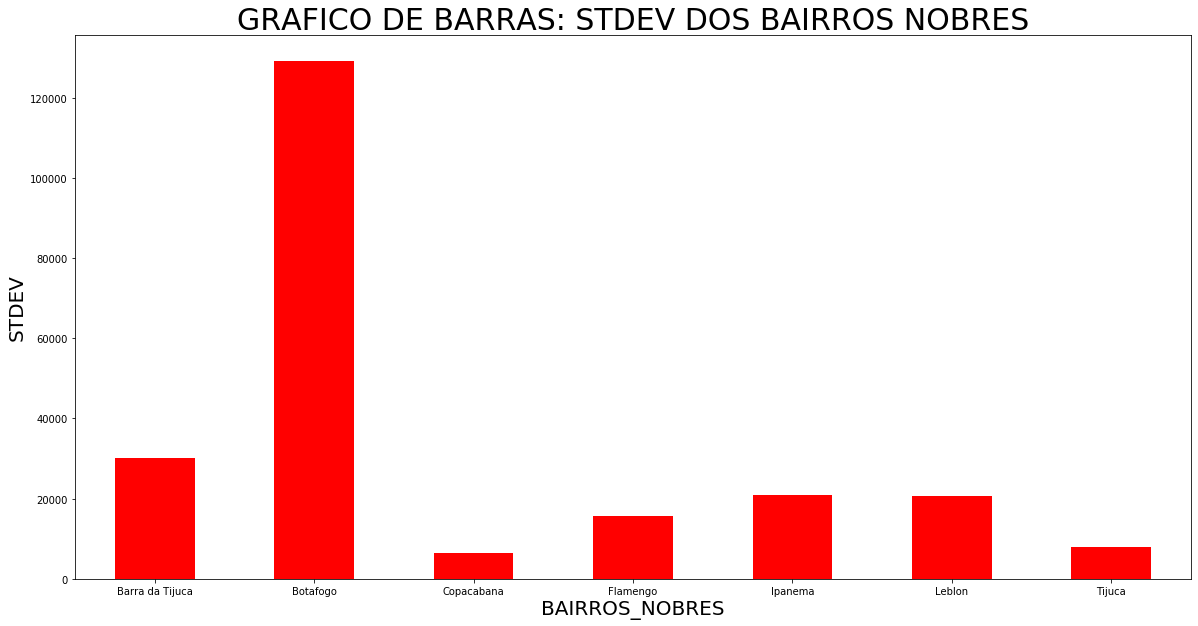

In [300]:
grafico_2 = grupo_bairro['Valor'].std().plot.bar(color = 'red')
grafico_2.set_ylabel('STDEV', {'fontsize': 20})
grafico_2.set_xlabel('BAIRROS_NOBRES', {'fontsize': 20})
grafico_2.set_title('GRAFICO DE BARRAS: STDEV DOS BAIRROS NOBRES', {'fontsize': 30})
grafico_2.tick_params(axis = 'x', rotation = 0)
plt.show()

## Identificando e removendo Outiliers

Para agregar ainda mais valor em nosso projeto, foram adicionadas informações acerca dos outliers no dataset e construido Box Plots.

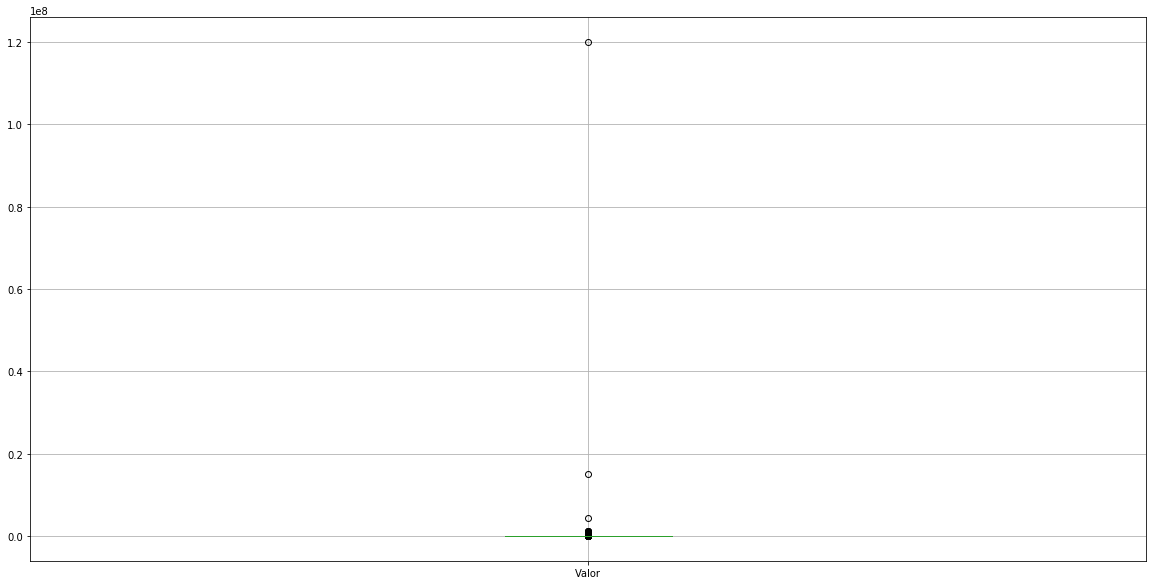

In [301]:
#Box plot do dataset completo
dados.boxplot(['Valor'])

In [302]:
#identificando os valores outliers que estão achatando o box plot e prejudicando a visualização
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2,Rotulo
826,Conjunto Comercial/Sala,Barra da Tijuca,0,0,0,5124,614000.0,0.0,0.0,614000.0,119.83,119.83,Apartmento
884,Conjunto Comercial/Sala,Botafogo,0,56,0,4235,529375.0,114599.0,34345.0,678319.0,125.00,160.17,Apartmento
1163,Conjunto Comercial/Sala,Cidade Nova,0,47,0,7357,514990.0,166709.0,14787.0,696486.0,70.00,94.67,Apartmento
2722,Conjunto Comercial/Sala,Centro,0,15,0,5666,530000.0,1.0,1.0,530002.0,93.54,93.54,Apartmento
2994,Prédio Inteiro,Barra da Tijuca,0,40,0,7500,600000.0,162000.0,13350.0,775350.0,80.00,103.38,Apartmento
4595,Galpão/Depósito/Armazém,Irajá,0,5,0,1100,15000000.0,0.0,1000.0,15001000.0,13636.36,13637.27,Apartmento
4628,Prédio Inteiro,Centro,0,0,0,6986,560000.0,0.0,0.0,560000.0,80.16,80.16,Apartmento
5565,Conjunto Comercial/Sala,Centro,0,30,0,4940,612550.0,128440.0,0.0,740990.0,124.00,150.00,Apartmento
5592,Prédio Inteiro,Jacarepaguá,0,15,0,1200,120000000.0,0.0,10000.0,120010000.0,100000.00,100008.33,Apartmento
8067,Prédio Inteiro,Centro,0,90,0,7774,505310.0,0.0,0.0,505310.0,65.00,65.00,Apartmento


In [303]:
valor = dados['Valor']
valor

0        1700.0
1        7000.0
2        5200.0
3         800.0
4         800.0
          ...  
32955     800.0
32956    1800.0
32957    1400.0
32958    3000.0
32959    6500.0
Name: Valor, Length: 32943, dtype: float64

In [304]:
#Calculando os quartis, intervalo interquartil e os limites do dataset
Q1 = valor.quantile(.25)
Q2 = valor.quantile(.50)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
LS = Q3 + 1.5 * IIQ
LI = Q1 - 1.5 * IIQ

In [305]:
print('Q1 = {} \nQ2 = {} \nQ3 = {} \nLI = {} \nLS = {} \nIIQ = {}'.format(Q1, Q2, Q3, LI, LS, IIQ))

Q1 = 1500.0 
Q2 = 2800.0 
Q3 = 6500.0 
LI = -6000.0 
LS = 14000.0 
IIQ = 5000.0


* CODIGO ESSENCIAL PARA EVITAR UM BOXPLOT ACHATADO

In [306]:
#Criando filtros de outliers para não obter um boxplot achatado e uma visualização melhor
selecao = (valor >= LI) & (valor <= LS)
dados_boxplot = dados[selecao]
dados_boxplot

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2,Rotulo
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Apartmento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,Casa
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0,34.67,68.87,Apartmento
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Apartmento
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Apartmento
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0,29.63,43.52,Apartmento
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0,23.08,33.85,Apartmento
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0,29.17,40.54,Apartmento
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,0.0,3760.0,42.86,53.71,Apartmento


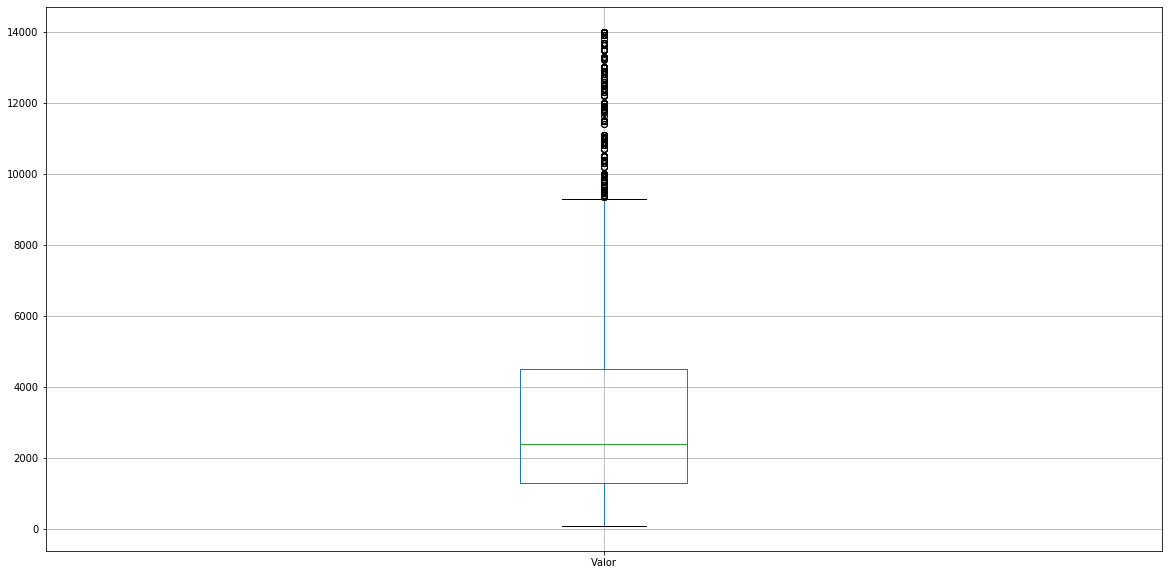

In [307]:
dados_boxplot.boxplot(['Valor'])

In [308]:
#Informações do boxplot acima
valor_aux = dados_boxplot['Valor']
Q1 = valor_aux.quantile(.25)
Q2 = valor_aux.quantile(.50)
Q3 = valor_aux.quantile(.75)
IIQ = Q3 - Q1
LS = Q3 + 1.5 * IIQ
LI = Q1 - 1.5 * IIQ

In [309]:
print('Q1 = {} \nQ2 = {} \nQ3 = {} \nLI = {} \nLS = {} \nIIQ = {}'.format(Q1, Q2, Q3, LI, LS, IIQ))

Q1 = 1300.0 
Q2 = 2400.0 
Q3 = 4500.0 
LI = -3500.0 
LS = 9300.0 
IIQ = 3200.0


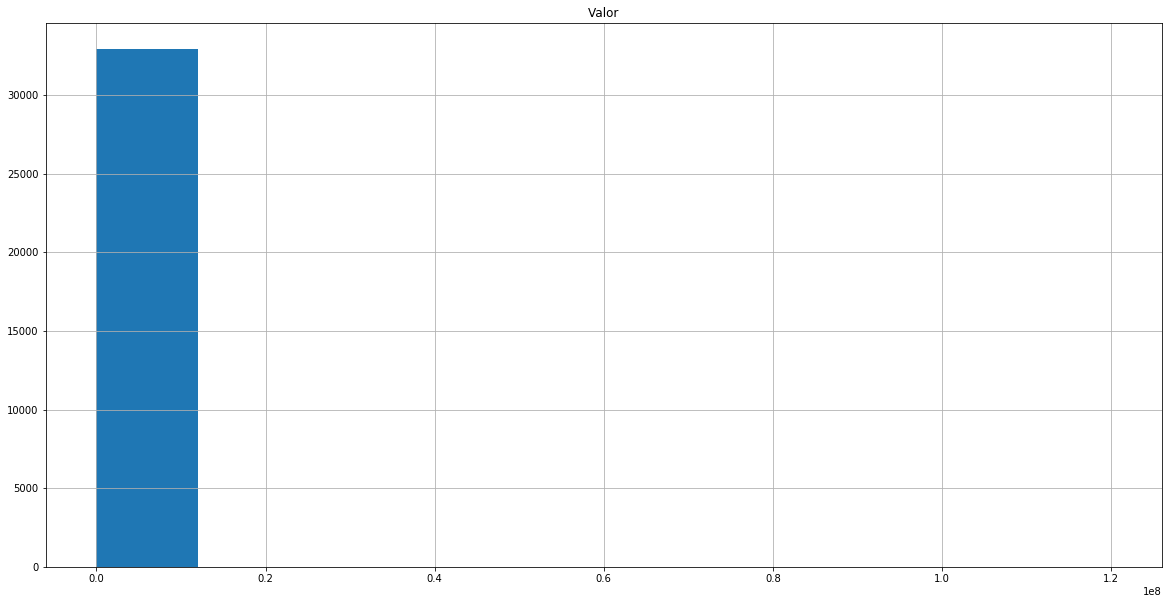

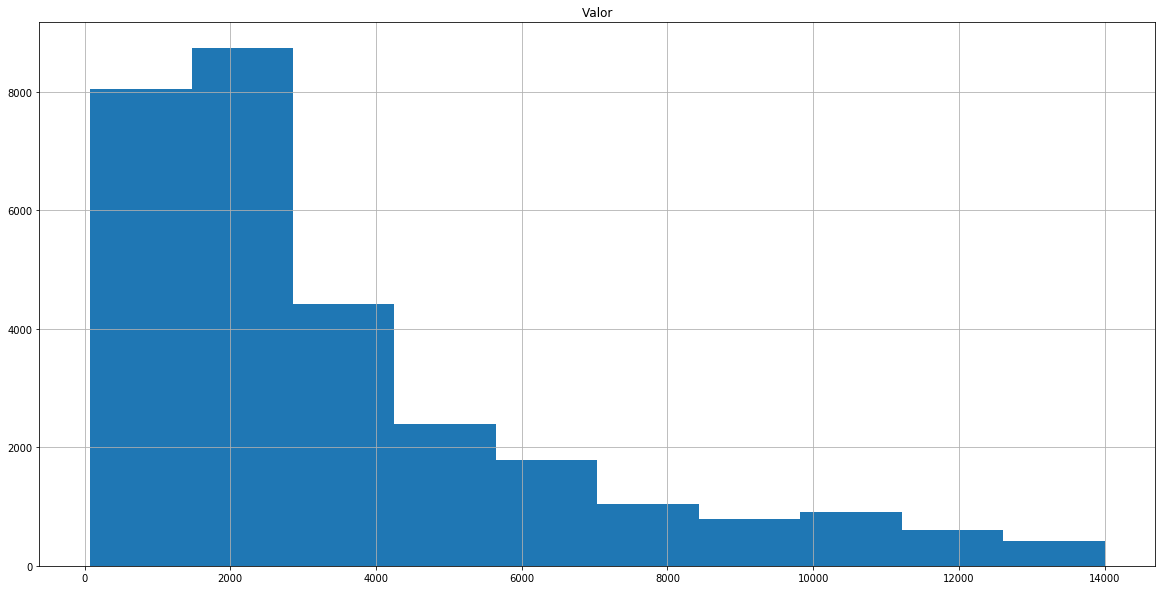

In [310]:
#Justificando de forma visual a decisão de diminuir a amostra de dados do dataset, utilizando como parametro o Limite superior e inferior do boxplot
n1 = dados.hist(['Valor'])

n2 = dados_boxplot.hist(['Valor'])
plt.show()

## Box plot para cada tipo de imóvel residencial

In [311]:
list(dados['Tipo'].drop_duplicates())

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

In [312]:
lista = ['Apartamento', 'Casa', 'Casa de Condomínio', 'Casa de Vila', 'Quitinete']
selecao = dados['Tipo'].isin(lista)
dados_residenciais = dados[selecao]
dados_residenciais['Tipo'].drop_duplicates()

0               Quitinete
1                    Casa
3             Apartamento
7      Casa de Condomínio
117          Casa de Vila
Name: Tipo, dtype: object

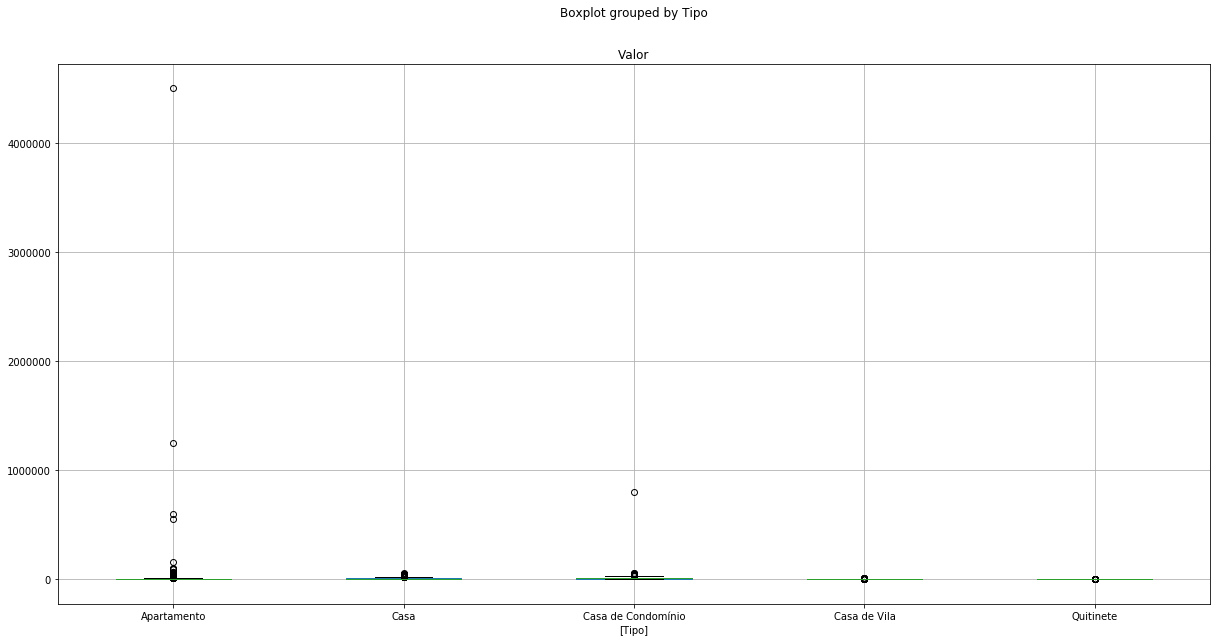

In [313]:
dados_residenciais.boxplot(['Valor'], by = ['Tipo'])

In [316]:
grupo_resid = dados_residenciais.groupby('Tipo')['Valor']

In [318]:
grupo_resid.groups

{'Apartamento': Int64Index([    3,     4,     5,     6,    10,    11,    12,    13,    15,
                19,
             ...
             32943, 32944, 32947, 32949, 32950, 32951, 32953, 32956, 32957,
             32958],
            dtype='int64', length=19525),
 'Casa': Int64Index([    1,    31,    74,    82,   138,   142,   216,   236,   269,
               357,
             ...
             32613, 32644, 32652, 32732, 32739, 32778, 32859, 32893, 32911,
             32931],
            dtype='int64', length=965),
 'Casa de Condomínio': Int64Index([    7,     8,    18,    22,    59,    85,   248,   253,   272,
               306,
             ...
             32792, 32796, 32807, 32853, 32867, 32869, 32898, 32908, 32924,
             32952],
            dtype='int64', length=996),
 'Casa de Vila': Int64Index([  117,   312,   324,   459,   504,  1052,  1239,  1271,  1377,
              1515,
             ...
             32041, 32048, 32137, 32245, 32282, 32302, 32620, 32686, 32804

In [320]:
Q1 = grupo_resid.quantile(.25)
Q2 = grupo_resid.quantile(.50)
Q3 = grupo_resid.quantile(.75)
IIQ = Q3 - Q1
LS = Q3 + 1.5 * IIQ
LI = Q1 - 1.5 * IIQ

In [321]:
print(Q1)
print('-=' * 10)
print(Q3)
print('-=' * 10)
print(IIQ)
print('-=' * 10)
print(LI)
print('-=' * 10)
print(LS)

Tipo
Apartamento           1600.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64
-=-=-=-=-=-=-=-=-=-=
Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64
-=-=-=-=-=-=-=-=-=-=
Tipo
Apartamento            3400.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64
-=-=-=-=-=-=-=-=-=-=
Tipo
Apartamento           -3500.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64
-=-=-=-=-=-=-=-=-=-=
Tipo
Apartamento           10100.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64


In [323]:
grupo_resid.groups.keys()

dict_keys(['Apartamento', 'Casa', 'Casa de Condomínio', 'Casa de Vila', 'Quitinete'])

In [324]:
for n in grupo_resid.groups.keys():
    print(n)

Apartamento
Casa
Casa de Condomínio
Casa de Vila
Quitinete


In [327]:
#Loop criado para gerar boxplots para cada grupo de tipo de imovel, de forma que esse boxplots sejam desachatados e com boa visibilidade
#Para desachatar os boxplots foi definido a condição que para entrar dentro da amostra de dados do boxplot, o dado precisa estar entre os limites inferior e superior, dessa forma os Outliers da amostra inicial são desconsiderados para a criação dos boxplots
df_box = pd.DataFrame()

for n in grupo_resid.groups.keys():
    confirmador_tipo = dados['Tipo'] == n
    confirmador_li_ls = (dados['Valor'] >= LI[n]) & (dados['Valor'] <= LS[n])
    selecao = confirmador_tipo & confirmador_li_ls
    dados_selecao = dados[selecao]
    df_box = pd.concat([df_box, dados_selecao])

In [328]:
df_box

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2,Rotulo
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Apartmento
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Apartmento
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,1200.0,17.14,17.14,Apartmento
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36,Apartmento
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0,1200.0,33.33,33.33,Apartmento
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32763,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0,517.0,40.00,51.70,Apartmento
32818,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0,1505.0,39.13,65.43,Apartmento
32844,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0,1423.0,45.83,59.29,Apartmento
32945,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,1986.0,68.18,90.27,Apartmento


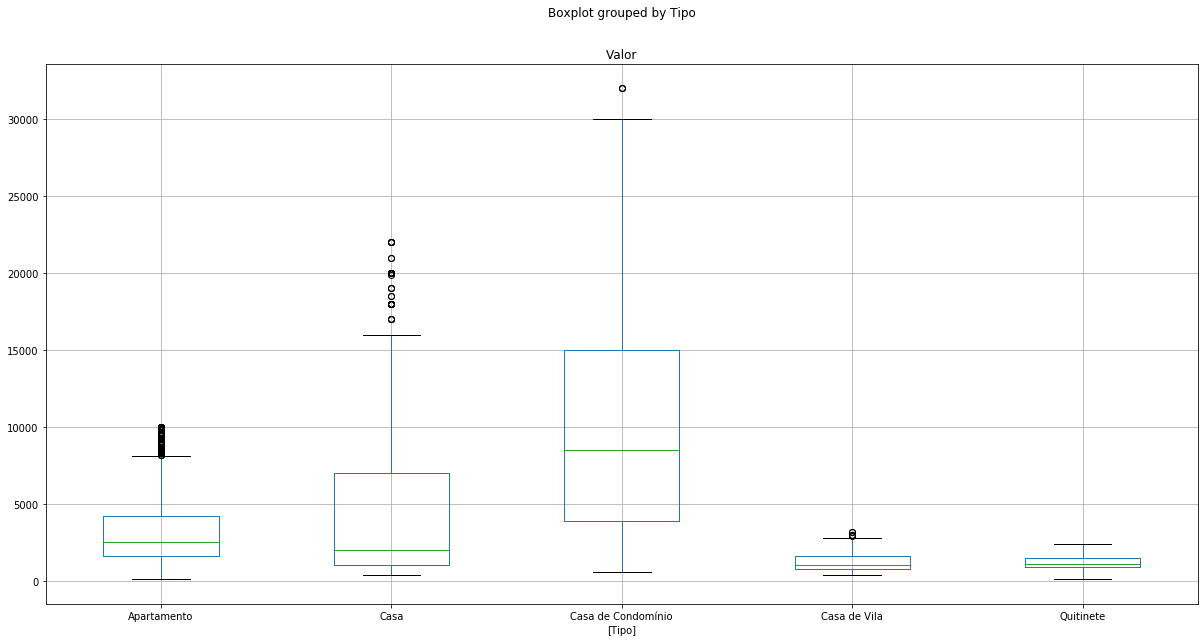

In [329]:
df_box.boxplot(['Valor'], by = ['Tipo'])

'3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]'